### Covid Analysis

The dataset contains the following columns:

* iso_code: ISO code for the location.
* location: Name of the location (e.g., continent, country).
* date: Date of the observation.
* new_cases: Number of new COVID-19 cases on that date.
* new_deaths: Number of new COVID-19 deaths on that date.
* new_cases_per_million: Number of new COVID-19 cases per million people on that date.
* new_deaths_per_million: Number of new COVID-19 deaths per million people on that date.
* population: Population of the location.


In [ ]:
# Business Questions

# What are the overall trends in new COVID-19 cases and deaths over time?
# How do new cases and deaths per million vary across different locations?
# Are there any significant correlations between new cases, new deaths, and population?

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the Dataset
df = pd.read_csv("new datas_covid.csv")

# Display the first few rows of the dataset
df.head()

,iso_code,location,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population
0,OWID_AFR,Africa,2020-01-05,0.0,0.0,0.0,0.0,1.426737e+09
1,OWID_AFR,Africa,2020-01-06,0.0,0.0,0.0,0.0,1.426737e+09
2,OWID_AFR,Africa,2020-01-07,0.0,0.0,0.0,0.0,1.426737e+09
3,OWID_AFR,Africa,2020-01-08,0.0,0.0,0.0,0.0,1.426737e+09
4,OWID_AFR,Africa,2020-01-09,0.0,0.0,0.0,0.0,1.426737e+09


In [9]:
df.info

<bound method DataFrame.info of         iso_code    location        date  new_cases  new_deaths  \
0       OWID_AFR      Africa  2020-01-05        0.0         0.0   
1       OWID_AFR      Africa  2020-01-06        0.0         0.0   
2       OWID_AFR      Africa  2020-01-07        0.0         0.0   
3       OWID_AFR      Africa  2020-01-08        0.0         0.0   
4       OWID_AFR      Africa  2020-01-09        0.0         0.0   
...          ...         ...         ...        ...         ...   
127383       MRT  Mauritania  2022-08-12        0.0         0.0   
127384       MRT  Mauritania  2022-08-13        0.0         0.0   
127385       MRT  Mauritania  2022-08-14       53.0         0.0   
127386       MRT  Mauritania  2022-08-15        0.0         0.0   
127387       MRT  Mauritania  2022-08-16        0.0         0.0   

        new_cases_per_million  new_deaths_per_million    population  
0                       0.000                     0.0  1.426737e+09  
1                      

In [10]:
# Summary statistics
df.describe()

,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population
count,1.229330e+05,122938.000000,122933.000000,122938.000000,1.273880e+05
mean,2.291656e+04,195.300875,85.338066,0.473285,3.498136e+08
std,4.161298e+05,2443.215026,1145.363784,3.716044,1.110133e+09
min,0.000000e+00,0.000000,0.000000,0.000000,5.401000e+03
25%,0.000000e+00,0.000000,0.000000,0.000000,4.736146e+06
50%,0.000000e+00,0.000000,0.000000,0.000000,1.939800e+07
75%,0.000000e+00,0.000000,0.000000,0.000000,7.169702e+07
max,4.423623e+07,103719.000000,240325.866000,148.222000,7.975105e+09


In [14]:
# Missing values
df.isnull().sum()
#df.isnull()

iso_code                     0
location                     0
date                         0
new_cases                 4455
new_deaths                4450
new_cases_per_million     4455
new_deaths_per_million    4450
population                   0
dtype: int64

1. What are the overall trends in new COVID-19 cases and deaths over time?

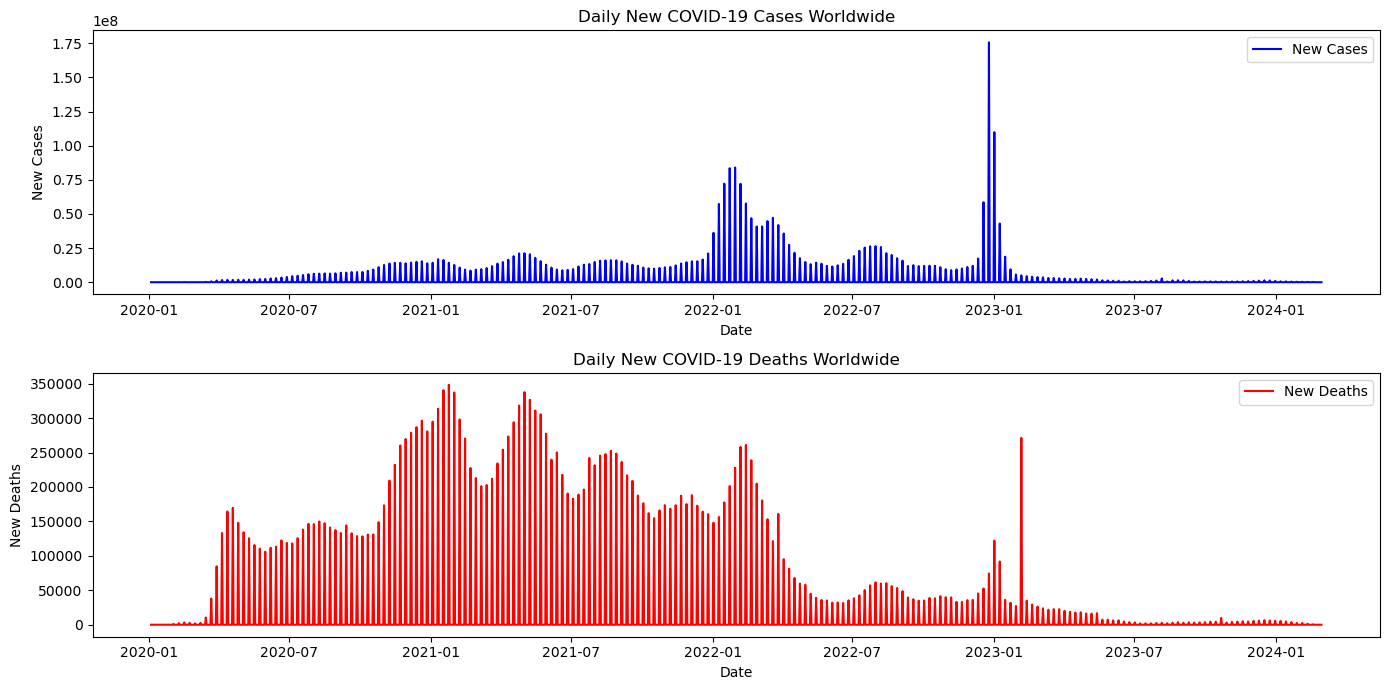

In [24]:
# let's analyze the time series trends of new cases and new deaths. We will visualize the trends over time. ​

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by date and sum the new cases and new deaths for each date
daily_data = df.groupby('date').sum().reset_index()

# Plot the time series for new cases and new deaths
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(daily_data['date'], daily_data['new_cases'], label='New Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New COVID-19 Cases Worldwide')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(daily_data['date'], daily_data['new_deaths'], label='New Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Daily New COVID-19 Deaths Worldwide')
plt.legend()

plt.tight_layout()
plt.show()

# The plots show the time series trends for new COVID-19 cases and deaths worldwide:

# 1. Daily New COVID-19 Cases Worldwide:

# The plot indicates various peaks and valleys, reflecting waves of infections over time.
# Significant peaks can be observed, likely corresponding to major waves of the pandemic.

# 2. Daily New COVID-19 Deaths Worldwide:

# This plot similarly shows peaks that follow the trends of new cases but typically lag behind by a few weeks.
# The peaks in deaths are usually less frequent but indicate the severity of certain waves of the pandemic.

In [23]:
# Group data by location and sum the new cases and new deaths for each location
location_data = df.groupby('location')[['new_cases', 'new_deaths']].sum().reset_index()

# Sort the data by new cases and new deaths to identify the most affected locations
top_cases_locations = location_data.sort_values(by='new_cases', ascending=False).head(10)
top_deaths_locations = location_data.sort_values(by='new_deaths', ascending=False).head(10)

top_cases_locations, top_deaths_locations


(               location    new_cases  new_deaths
 84                World  774759003.0   6987811.0
 24          High income  428244544.0   2927523.0
 3                  Asia  301411131.0   1636712.0
 19               Europe  252247962.0   2098323.0
 80  Upper middle income  245391900.0   2666960.0
 20       European Union  185570287.0   1259953.0
 50        North America  124517402.0   1604753.0
 14                China   99331724.0    121956.0
 40  Lower middle income   97582041.0   1341317.0
 66        South America   68670504.0   1356900.0,
                location    new_cases  new_deaths
 84                World  774759003.0   6987811.0
 24          High income  428244544.0   2927523.0
 80  Upper middle income  245391900.0   2666960.0
 19               Europe  252247962.0   2098323.0
 3                  Asia  301411131.0   1636712.0
 50        North America  124517402.0   1604753.0
 66        South America   68670504.0   1356900.0
 40  Lower middle income   97582041.0   1341317.0

2. How do new cases and deaths per million vary across different locations?

In [26]:
# aggregating the data and calculating the necessary summary statistics

# Group the data by location and calculate the mean of new cases and deaths per million
location_stats = df.groupby('location').agg({
    'new_cases_per_million': ['mean', 'sum'],
    'new_deaths_per_million': ['mean', 'sum']
}).reset_index()

# Flatten the MultiIndex columns
location_stats.columns = ['location', 'mean_new_cases_per_million', 'total_new_cases_per_million',
                          'mean_new_deaths_per_million', 'total_new_deaths_per_million']

# Display the summary statistics
location_stats.head()


,location,mean_new_cases_per_million,total_new_cases_per_million,mean_new_deaths_per_million,total_new_deaths_per_million
0,Afghanistan,3.745398,5640.570,0.128871,194.079
1,Africa,6.115220,9209.521,0.120583,181.598
2,Armenia,107.806035,162355.888,2.095584,3155.950
3,Asia,42.390162,63839.584,0.230183,346.656
4,Azerbaijan,53.514383,80592.661,0.663687,999.513


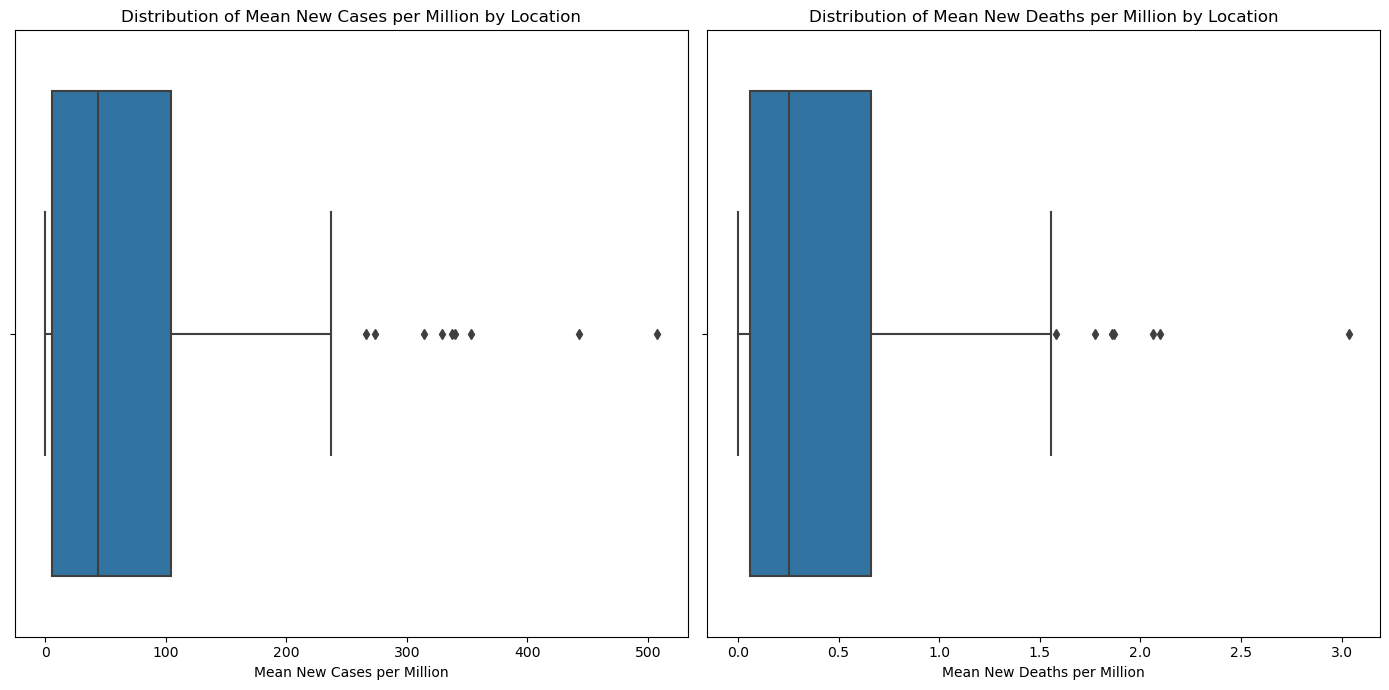

In [27]:
# Set the plot size for better visibility
plt.figure(figsize=(14, 7))

# Create a boxplot for mean new cases per million
plt.subplot(1, 2, 1)
sns.boxplot(x='mean_new_cases_per_million', data=location_stats)
plt.title('Distribution of Mean New Cases per Million by Location')
plt.xlabel('Mean New Cases per Million')

# Create a boxplot for mean new deaths per million
plt.subplot(1, 2, 2)
sns.boxplot(x='mean_new_deaths_per_million', data=location_stats)
plt.title('Distribution of Mean New Deaths per Million by Location')
plt.xlabel('Mean New Deaths per Million')

plt.tight_layout()
plt.show()

In [ ]:
# The box plots show the distribution of mean new cases per million and mean new deaths per million across different locations. 

# Observations:

# The distribution of mean new cases per million has a wider spread compared to mean new deaths per million, indicating greater variability in new case rates across different locations.

# There are some locations with very high mean new cases per million, visible as outliers in the plot.

# The distribution of mean new deaths per million is more concentrated with fewer extreme outliers.

3. Are there any significant correlations between new cases, new deaths, and population?

To investigate correlations between new cases, new deaths, and population, we can calculate the correlation coefficients between these variables. Pearson's correlation coefficient is a common measure for this purpose. It ranges from -1 to 1, where:

* 1 indicates a perfect positive correlation,
* -1 indicates a perfect negative correlation,
* 0 indicates no correlation.



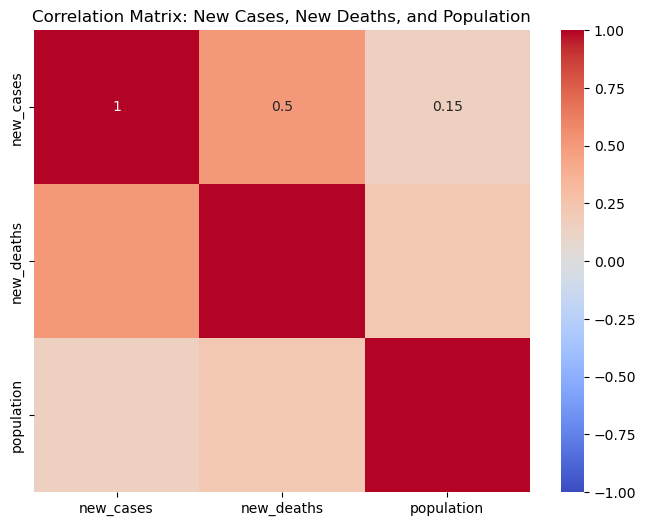

,new_cases,new_deaths,population
new_cases,1.000000,0.504169,0.151138
new_deaths,0.504169,1.000000,0.221918
population,0.151138,0.221918,1.000000


In [28]:
# Calculate the correlation matrix
correlation_matrix = df[['new_cases', 'new_deaths', 'population']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: New Cases, New Deaths, and Population')
plt.show()

# Display the correlation matrix
correlation_matrix